In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('te_data_sm.dat', names=['S&M x'])
b1 = pd.read_csv('b1_sm.dat', names=['b1'])
b2 = pd.read_csv('b2_sm.dat', names=['b2'])
w1 = pd.read_csv('w1_sm.dat', names=['w1'])
w2 = pd.read_csv('w2_sm.dat', names=['w2'])
label = pd.read_csv('te_lable_sm.dat', names=['label'])

In [3]:
label.head()

,label
0,8
1,6
2,1
3,4
4,6


In [4]:
df.head()

,S&M x
0,FF
1,F2
2,98
3,FF
4,DD


In [5]:
df.shape

(46500, 1)

In [6]:
def smtod(s):
    if(s[0]=='0'):
        return int(s[1:], 2)
    return -int(s[1:],2)

In [7]:
def transform(df, name):
    global smtod
    df['1'] = df[name].astype(str).str[0]
    df['2'] = df[name].astype(str).str[1]
    m = {'0':'0000', '1':'0001', '2':'0010', '3':'0011', '4':'0100',
    '5':'0101', '6':'0110', '7':'0111', '8':'1000', '9':'1001',
    'A':'1010', 'B':'1011', 'C':'1100', 'D':'1101', 'E':'1110', 'F':'1111'}
    df[name] = df['1'].map(m)+df['2'].map(m)
    df = df.drop(columns=['1','2'])
    df[name] = df[name].map(smtod)
    return df

In [8]:
df = transform(df, 'S&M x')
df.head()

,S&M x
0,-127
1,-114
2,-24
3,-127
4,-93


In [9]:
x = np.array(df['S&M x'])
x.shape

(46500,)

In [10]:
x = x.reshape((750,62))

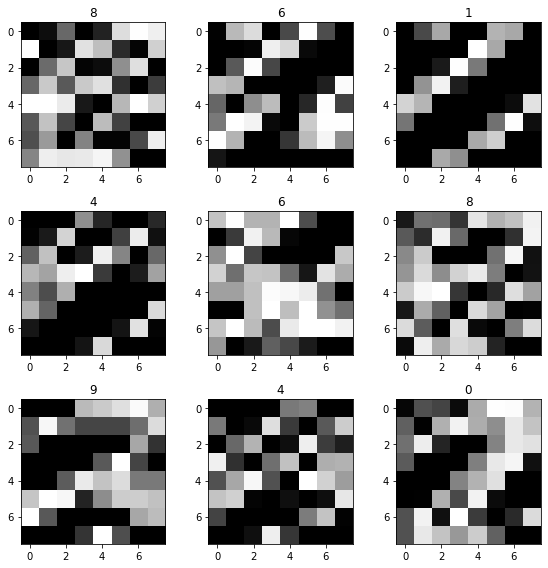

In [11]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(np.append(x[i]+127,[0,0]).reshape(8,8), cmap='gray')
    plt.title(label['label'][i])
plt.tight_layout()

In [12]:
b1 = transform(b1, 'b1')
b2 = transform(b2, 'b2')
w1 = transform(w1, 'w1')
w2 = transform(w2, 'w2')

In [13]:
w1 = np.array(w1)
w1 = w1.reshape(30,62)
w2 = np.array(w2)
w2 = w2.reshape(10,30)
b1 = np.array(b1)
b2 = np.array(b2)

In [14]:
def relu(x):
    return np.where(x<0,0,x)

In [15]:
def sat(x):
    return np.where(x>127,127,x)

In [16]:
H_out = np.matmul(w1,x.T)
H_out += b1*127
H_out = H_out>>9
H_out = relu(H_out)
H_out = sat(H_out)
out = np.matmul(w2,H_out)
out += b2*127
out = out>>9
out = relu(out)
out = sat(out)
pred = np.argmax(out.T, axis=-1)

In [17]:
final = pd.DataFrame({'label':label['label'], 'pred':pred})
final.head()

,label,pred
0,8,8
1,6,6
2,1,1
3,4,4
4,6,6


In [18]:
print('precision: {:.3f}%'.format(sum(final['label']==final['pred'])/len(final)*100))

precision: 89.867%


In [19]:
final[final['label']!=final['pred']].head()

,label,pred
6,9,4
17,4,1
20,3,1
28,9,4
50,2,4


In [20]:
final.iloc[658]

label    9
pred     3
Name: 658, dtype: int64

In [21]:
final.iloc[660]

label    0
pred     8
Name: 660, dtype: int64